# Customer Market Segmentation using Clustering

# Data Overview

Source - [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

Basic data about customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Importing Libraries

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [3]:
data = pd.read_csv('../input/Mall_Customers.csv')

In [4]:
print(data.sample(10))
print('\n','-'*100,'\n')
print(data.shape)
print('\n','-'*100,'\n')
print(data.info())
print('\n','-'*100,'\n')
print(data.describe())
print('\n','-'*100,'\n')

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
65           66    Male   18                  48                      59
63           64  Female   54                  47                      59
143         144  Female   32                  76                      87
128         129    Male   59                  71                      11
169         170    Male   32                  87                      63
59           60    Male   53                  46                      46
105         106  Female   21                  62                      42
131         132    Male   39                  71                      75
14           15    Male   37                  20                      13
156         157    Male   37                  78                       1

 ---------------------------------------------------------------------------------------------------- 

(200, 5)

 ---------------------------------------------------------------------------------

# Data Pre-Processing and Exploration

In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

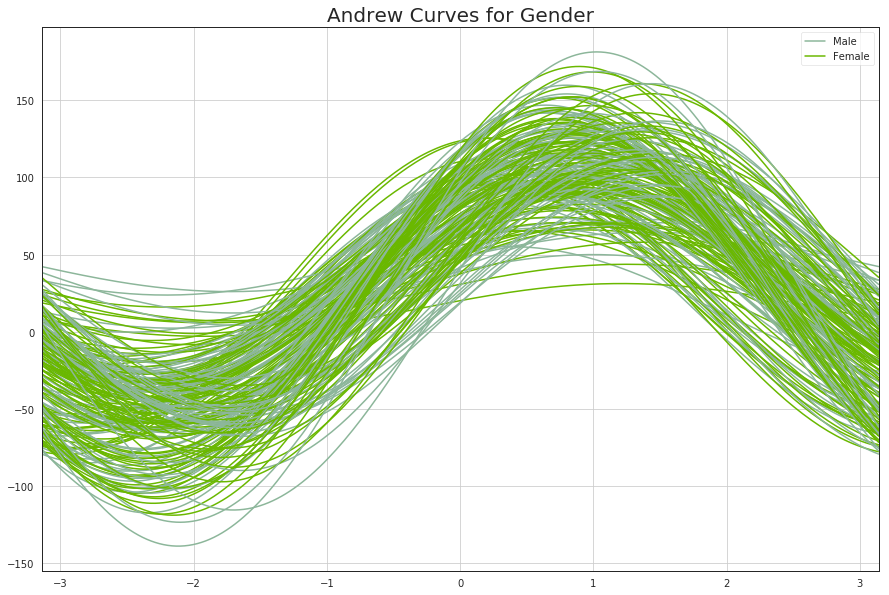

In [11]:
plt.rcParams['figure.figsize'] = (15, 10)
plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

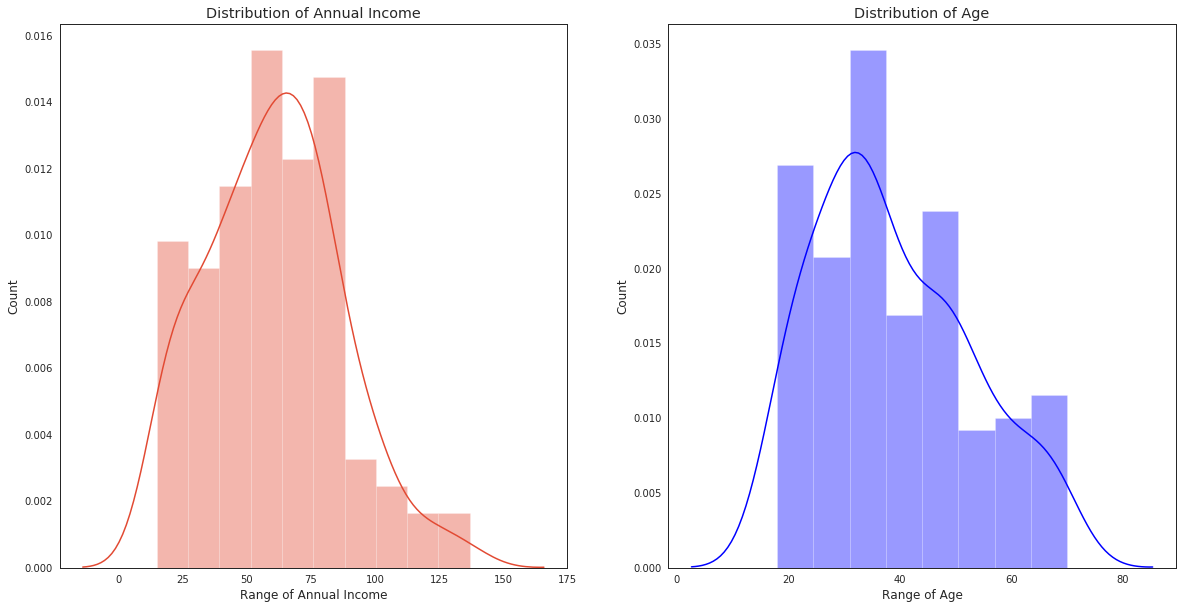

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)

plt.subplot(1, 2, 1)
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.distplot(data['Age'], color = 'blue')
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

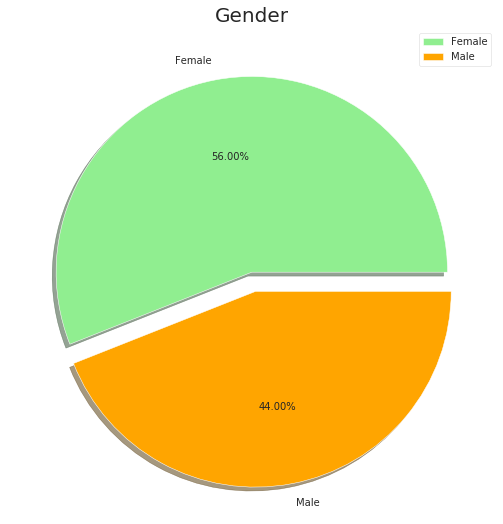

In [16]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

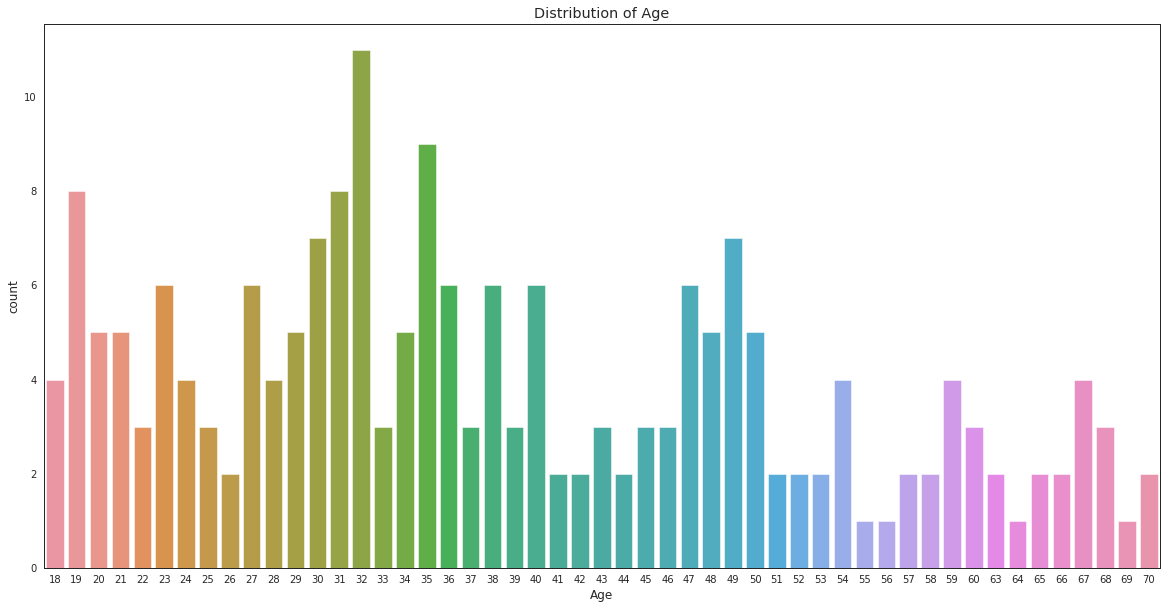

In [24]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.show()

> This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.
>> By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.
>> Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67.
>> People of Age 55, 56, 69, 64 are very less frequent in the Malls.
>> People at Age 32 are the Most Frequent Visitors in the Mall.

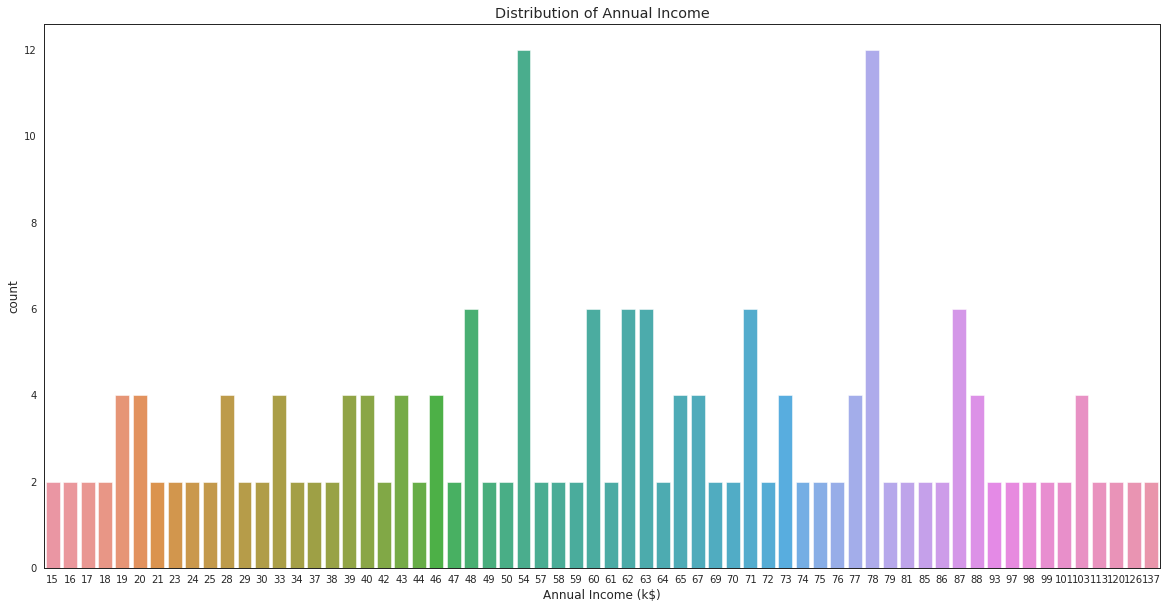

In [20]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.show()

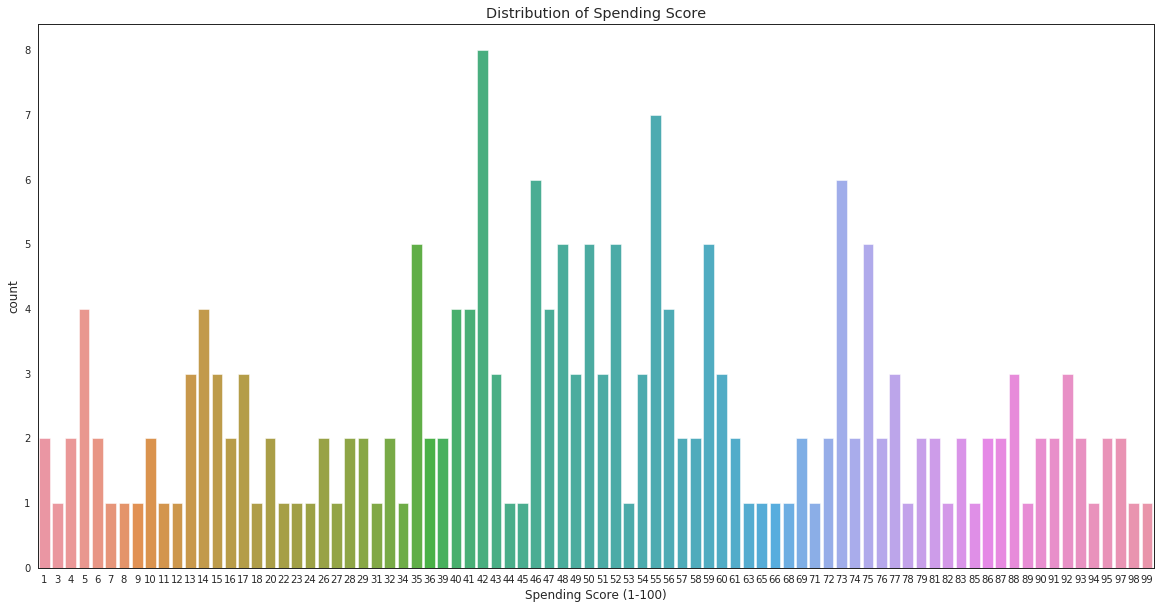

In [23]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score')
plt.show()

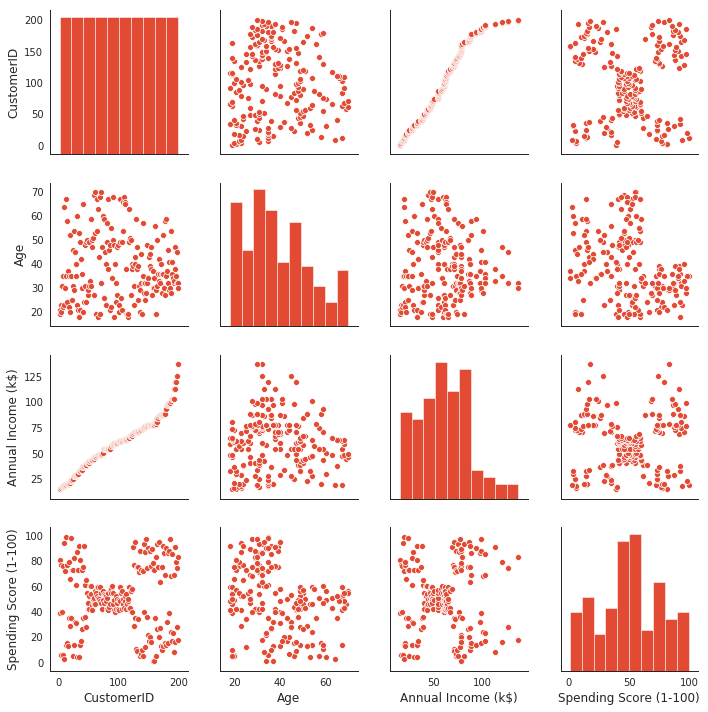

In [21]:
sns.pairplot(data)
plt.show()

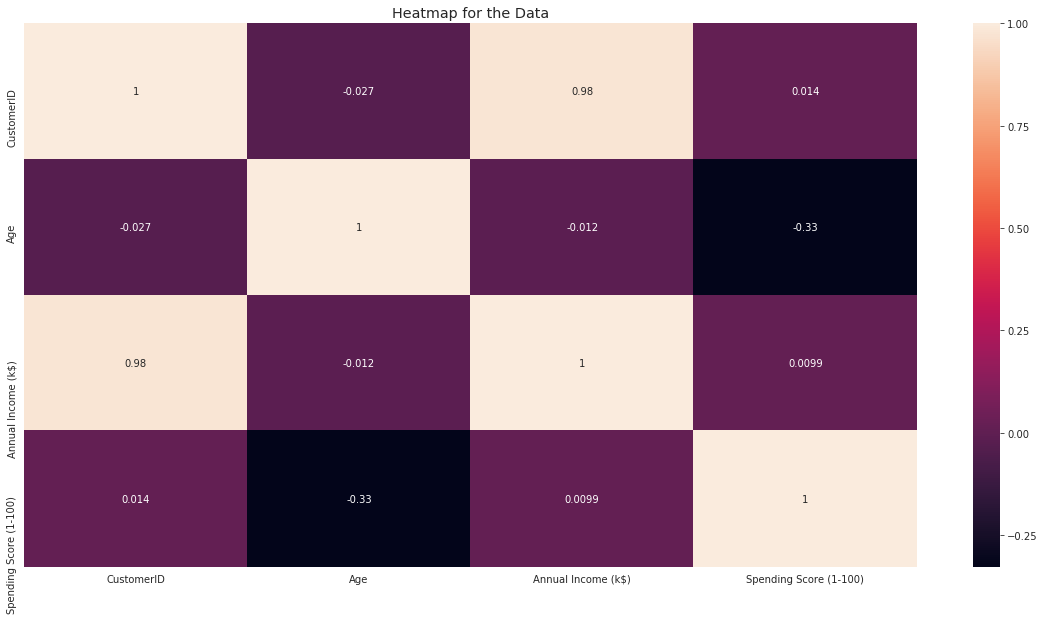

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(data.corr(), annot = True)
plt.title('Heatmap for the Data')
plt.show()

# Modelling and Results

In [31]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


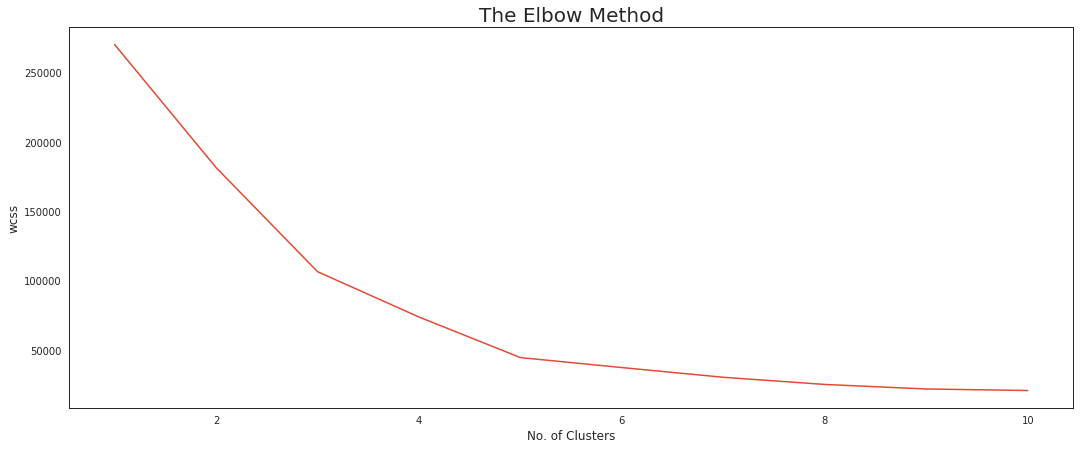

In [32]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

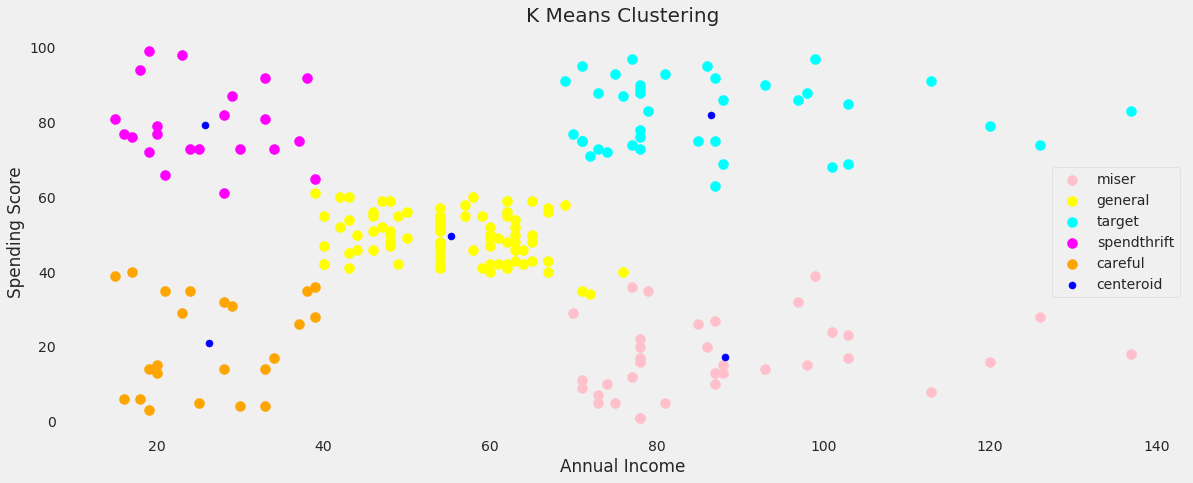

In [34]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc = 'best')
plt.grid()
plt.show()

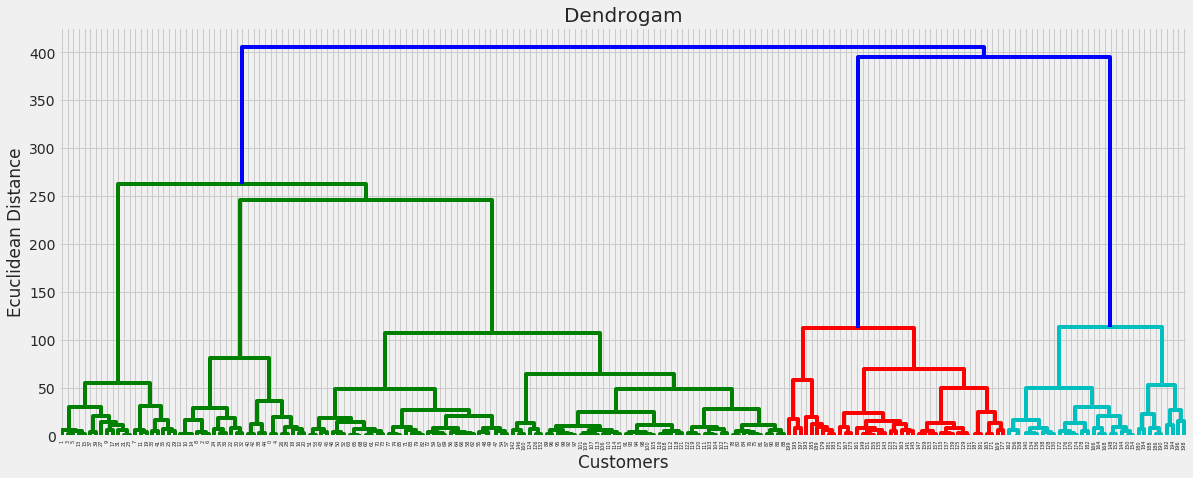

In [35]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

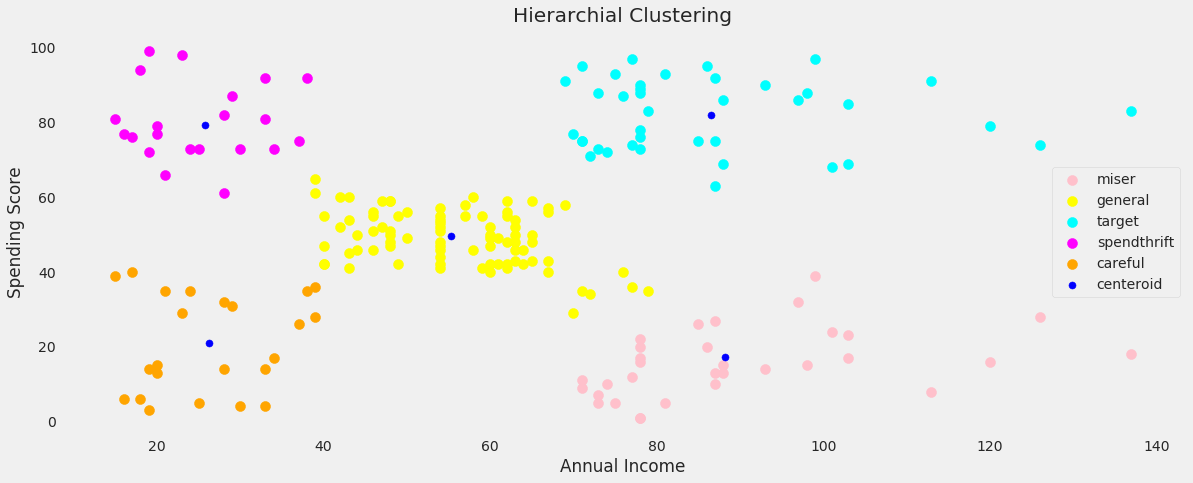

In [37]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Hierarchial Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [38]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

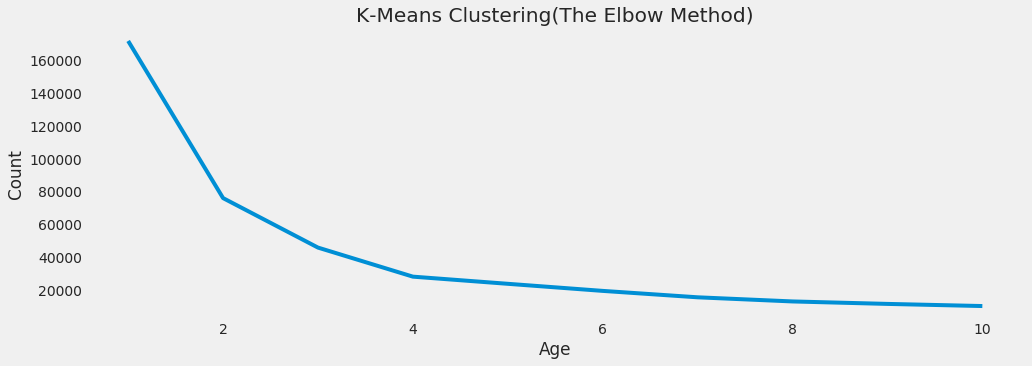

In [41]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

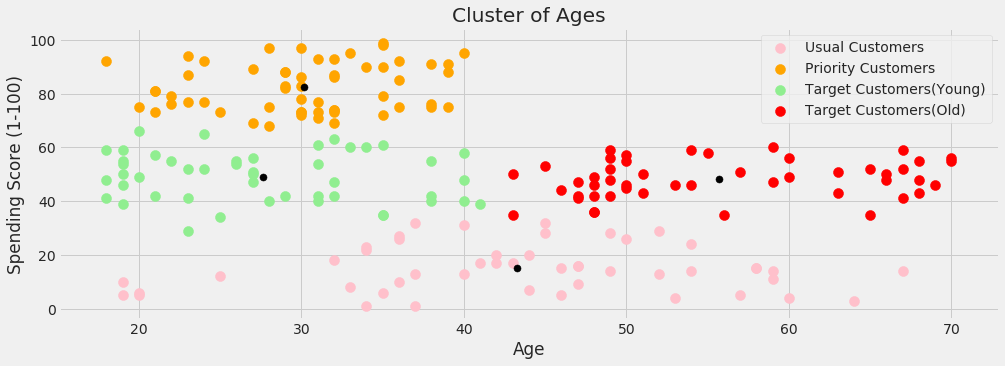

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.title('Cluster of Ages')

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()